In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

In [184]:
url='https://drive.google.com/file/d/10w2IKL8C8JC-VPQVOpmWU_nRzNn0NEur/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [185]:
X = df.iloc[:,1:2].values
y= df.iloc[: , -1].values
y.ndim

1

In [186]:
print(y)  # now y is 1-Dim Array we need to convert this arr to 2dim , bcz we need to feed this data to fit_transform() which take 2 dim 
y.ndim

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


1

In [187]:
y= y.reshape(len(y) , 1)   # now y is 2d 
y.ndim

2

Feature Scalling 

In [188]:
from sklearn.preprocessing import StandardScaler
sts_X = StandardScaler()
X = sts_X.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [189]:
# feature Scaling for y bez , y has diffrent value (will apply mean , median )
from sklearn.preprocessing import StandardScaler
sts_y= StandardScaler()
y =sts_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Training the SVR Model on whole dataSet

In [192]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
#regressor.fit(X , y)
regressor.fit(X,np.ravel(y,order="c"))

SVR()

In [208]:
# predict a new Result
predicted_result=regressor.predict(sts_X.transform([[6.5]]))

predicted_result = predicted_result.reshape(len(predicted_result),1)
sts_y.inverse_transform(predicted_result)



array([[170370.0204065]])

Visualising The SVR result

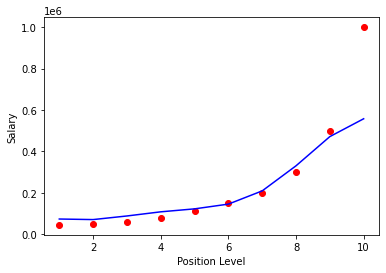

In [211]:
plt.scatter(sts_X.inverse_transform(X) , sts_y.inverse_transform(y), color='red')
predicted_result=regressor.predict(X)
predicted_result=predicted_result.reshape(len(predicted_result),1)

plt.plot(sts_X.inverse_transform(X) , sts_y.inverse_transform(predicted_result), color='blue')
plt.title('')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#feature Scalling using Normalization 

from sklearn.preprocessing import MinMaxScaler

mms_X= MinMaxScaler()
X =mms_X.fit_transform(X)

mms_y = MinMaxScaler()
y = mms_y.fit_transform(y) 



array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])

In [ ]:
print('normalization x value', X)

normalization x value [[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]
